In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

### 재표본 추출(순열검정)

In [51]:
session_times

,Page,Time
0,Page A,0.21
1,Page B,2.53
2,Page A,0.35
3,Page B,0.71
4,Page A,0.67
5,Page B,0.85
6,Page A,2.11
7,Page B,2.46
8,Page A,1.32
9,Page B,1.49


In [36]:
session_times = pd.read_csv('web_page_data.csv')

Text(0.5, 0.98, '')

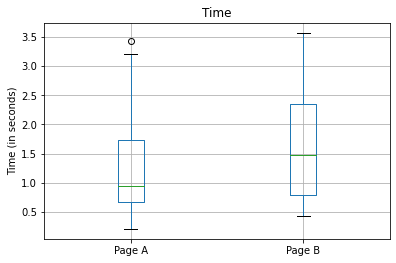

In [37]:
ax = session_times.boxplot(by = 'Page', column = 'Time')
ax.set_xlabel('')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')


In [38]:
mean_a = session_times[session_times.Page == 'Page A'].Time.mean()
mean_b = session_times[session_times.Page == 'Page B'].Time.mean()
mean_b - mean_a

0.35666666666666713

In [39]:
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[idx_B].mean() - x.loc[idx_A].mean()

Text(0, 0.5, 'Frequency')

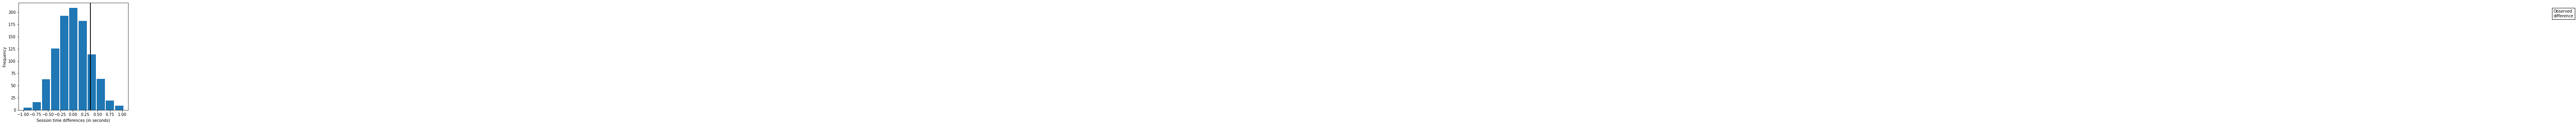

In [40]:
%matplotlib inline
perm_diffs = [perm_fun(session_times.Time, nA, nB) for _ in range(1000)]

fig, ax = plt.subplots(figsize = (5,5))
ax.hist(perm_diffs, bins = 11, rwidth = 0.9)
ax.axvline(x = mean_b - mean_a, color = 'black', lw=2)
ax.text(50, 190, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Session time differences (in seconds)')
ax.set_ylabel('Frequency')

In [41]:
np.mean(np.array(perm_diffs) > mean_b - mean_a)

0.153

### 통계적 유의성과 p값

Obserbed difference: 0.0368%


Text(0, 0.5, 'Freqeuncy')

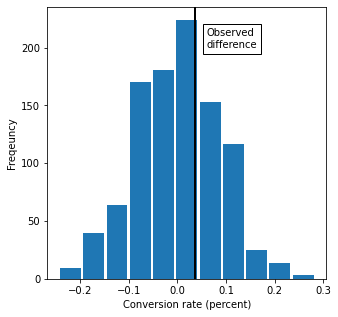

In [43]:
obs_pct_diff = 100 * (200 / 23739 - 182 / 22588)
print(f'Obserbed difference: {obs_pct_diff:.4f}%')
conversion = [0] * 45945
conversion.extend([1] * 382)
conversion = pd.Series(conversion)

perm_diffs = [100 * perm_fun(conversion, 23739, 22588)
             for _ in range(1000)]

fig, ax = plt.subplots(figsize = (5,5))
ax.hist(perm_diffs, bins = 11, rwidth = 0.9)
ax.axvline(x=obs_pct_diff, color = 'black', lw=2)
ax.text(0.06, 200, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Conversion rate (percent)')
ax.set_ylabel('Freqeuncy')

In [44]:
np.mean([diff > obs_pct_diff for diff in perm_diffs])

0.343

In [49]:
from scipy import stats

survivors = np.array([[200, 23739 - 200], [182, 22588 - 182]])
chi2, p_value, df, _ = stats.chi2_contingency(survivors)

print(f'p_value for single sided test: {p_value / 2:0.4f}')

p_value for single sided test: 0.3498


### T 검정


In [50]:
res = stats.ttest_ind(session_times[session_times.Page == 'Page A'].Time,
                      session_times[session_times.Page == 'Page B'].Time,
                      equal_var = False)
print(f'p-value for single sided test : {res.pvalue / 2:.4f}')

p-value for single sided test : 0.1408
